# Regresion Lineal Multiple

## Importar las librerías

In [5]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *

## Importar el conjunto de datos

In [6]:
datos = pd.read_csv("baseball_reference_2016_scrape.csv")

## Obtención de información sobre los datos

In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   attendance         2460 non-null   object 
 1   away_team          2460 non-null   object 
 2   away_team_errors   2460 non-null   int64  
 3   away_team_hits     2460 non-null   int64  
 4   away_team_runs     2460 non-null   int64  
 5   boxscore_url       2460 non-null   object 
 6   date               2460 non-null   object 
 7   field_type         0 non-null      float64
 8   game_duration      2460 non-null   object 
 9   game_type          2460 non-null   object 
 10  home_team          2460 non-null   object 
 11  home_team_errors   2460 non-null   int64  
 12  home_team_hits     2460 non-null   int64  
 13  home_team_runs     2460 non-null   int64  
 14  other_info_string  2460 non-null   object 
 15  start_time         2460 non-null   object 
 16  venue              2460 

## Descripción adicional de los datos

In [8]:
profile = ProfileReport(datos)
profile

Render HTML: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.05s/it]


## Más descripción adicional de los datos

In [9]:
datos.describe()

away_team_errors  away_team_hits  away_team_runs  field_type  \
count       2460.000000     2460.000000     2460.000000         0.0   
mean           0.580081        8.767073        4.415041         NaN   
std            0.793227        3.512687        3.105390         NaN   
min            0.000000        1.000000        0.000000         NaN   
25%            0.000000        6.000000        2.000000         NaN   
50%            0.000000        8.000000        4.000000         NaN   
75%            1.000000       11.000000        6.000000         NaN   
max            5.000000       22.000000       21.000000         NaN   

       home_team_errors  home_team_hits  home_team_runs  
count       2460.000000     2460.000000     2460.000000  
mean           0.586179        8.611382        4.520325  
std            0.805817        3.438679        3.112502  
min            0.000000        0.000000        0.000000  
25%            0.000000        6.000000        2.000000  
50%            0.000000        8.000000        4.000000  
75%            1.000000       11.000000        6.000000  
max            5.000000       22.000000       17.000000

## Obtención de datos numéricos

In [27]:
datos = datos.loc[:, datos.columns!="field_type"]
datos.select_dtypes(exclude='object')

away_team_errors  away_team_hits  away_team_runs  home_team_errors  \
0                    1               7               3                 0   
1                    0               5               2                 0   
2                    0               5               2                 0   
3                    0               8               3                 1   
4                    1               8               4                 0   
...                ...             ...             ...               ...   
2458                 2               7               5                 1   
2459                 0               5               1                 1   
2460                 0               6               3                 2   
2461                 0              13               7                 1   
2462                 1              10               6                 0   

      home_team_hits  home_team_runs  
0                  9               4  
1                  8               3  
2                  9               4  
3                  8               1  
4                  8               3  
...              ...             ...  
2458               7               3  
2459               9               4  
2460               9               4  
2461              10               3  
2462               9               7  

[2463 rows x 6 columns]

## Obtención de datos para ver su estructura

In [1]:
datos.head(15)

attendance              away_team  away_team_errors  away_team_hits  \
0    40,030']          New York Mets                 1               7   
1    21,621']  Philadelphia Phillies                 0               5   
2    12,622']        Minnesota Twins                 0               5   
3    18,531']   Washington Nationals                 0               8   
4    18,572']       Colorado Rockies                 1               8   
5    28,386']       Seattle Mariners                 1              11   
6    12,757']      Toronto Blue Jays                 0               9   
7    28,329']    Los Angeles Dodgers                 0               6   
8    26,049']    St. Louis Cardinals                 1               8   
9    10,478']      Chicago White Sox                 0              11   
10   47,820']         Houston Astros                 0               6   
11   24,123']   San Francisco Giants                 0               7   
12   36,911']         Detroit Tigers                 1              12   
13   13,468']          Texas Rangers                 0              14   
14   45,229']       San Diego Padres                 0               6   

    away_team_runs                                       boxscore_url  \
0                3  https://www.baseball-reference.com/boxes/KCA/K...   
1                2  https://www.baseball-reference.com/boxes/CIN/C...   
2                2  https://www.baseball-reference.com/boxes/BAL/B...   
3                3  https://www.baseball-reference.com/boxes/ATL/A...   
4                4  https://www.baseball-reference.com/boxes/ARI/A...   
5               10  https://www.baseball-reference.com/boxes/TEX/T...   
6                2  https://www.baseball-reference.com/boxes/TBA/T...   
7                3  https://www.baseball-reference.com/boxes/SDN/S...   
8                5  https://www.baseball-reference.com/boxes/PIT/P...   
9                5  https://www.baseball-reference.com/boxes/OAK/O...   
10               5  https://www.baseball-reference.com/boxes/NYA/N...   
11               2  https://www.baseball-reference.com/boxes/MIL/M...   
12               8  https://www.baseball-reference.com/boxes/MIA/M...   
13               7  https://www.baseball-reference.com/boxes/SEA/S...   
14               4  https://www.baseball-reference.com/boxes/PHI/P...   

                        date  field_type game_duration             game_type  \
0      Sunday, April 3, 2016         NaN        : 3:13  Night Game, on grass   
1   Wednesday, April 6, 2016         NaN        : 2:23  Night Game, on grass   
2   Wednesday, April 6, 2016         NaN        : 3:11  Night Game, on grass   
3   Wednesday, April 6, 2016         NaN        : 2:53  Night Game, on grass   
4   Wednesday, April 6, 2016         NaN        : 2:39    Day Game, on grass   
5     Tuesday, April 5, 2016         NaN        : 3:30  Night Game, on grass   
6     Tuesday, April 5, 2016         NaN        : 3:07   Night Game, on turf   
7     Tuesday, April 5, 2016         NaN        : 2:36  Night Game, on grass   
8     Tuesday, April 5, 2016         NaN        : 3:27  Night Game, on grass   
9     Tuesday, April 5, 2016         NaN        : 3:28  Night Game, on grass   
10    Tuesday, April 5, 2016         NaN        : 3:17    Day Game, on grass   
11    Tuesday, April 5, 2016         NaN        : 2:29  Night Game, on grass   
12    Tuesday, April 5, 2016         NaN        : 3:47  Night Game, on grass   
13    Monday, April 11, 2016         NaN        : 3:00  Night Game, on grass   
14    Monday, April 11, 2016         NaN        : 2:51    Day Game, on grass   

                home_team  home_team_errors  home_team_hits  home_team_runs  \
0      Kansas City Royals                 0               9               4   
1         Cincinnati Reds                 0               8               3   
2       Baltimore Orioles                 0               9               4   
3          Atlanta Braves                 1         

## Inicio gráficos de exploración

## Gráfico conteo de tipos de juego

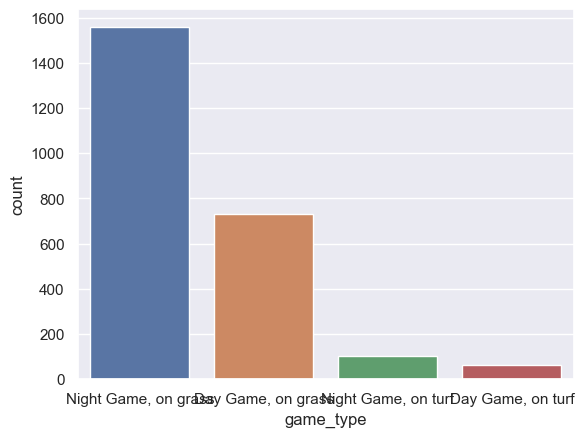

In [15]:
sns.countplot(x = 'game_type', data = datos);

## Gráfico conteo de veces siendo locales por equipo

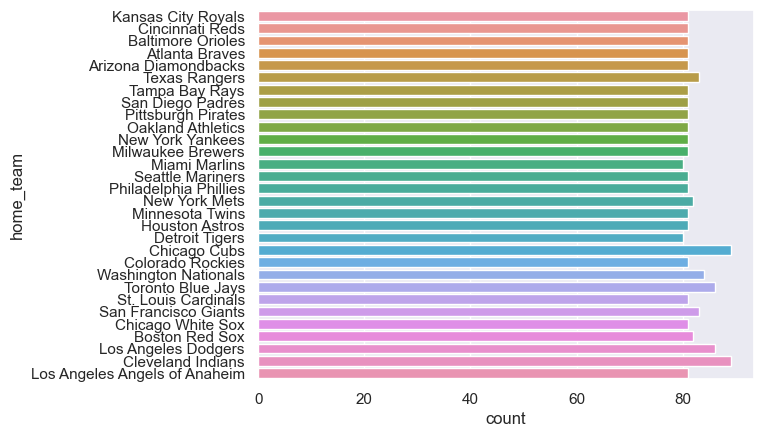

In [35]:
sns.countplot(y = 'home_team', data = datos);

## Gráfico conteo de veces siendo visitantes por equipo

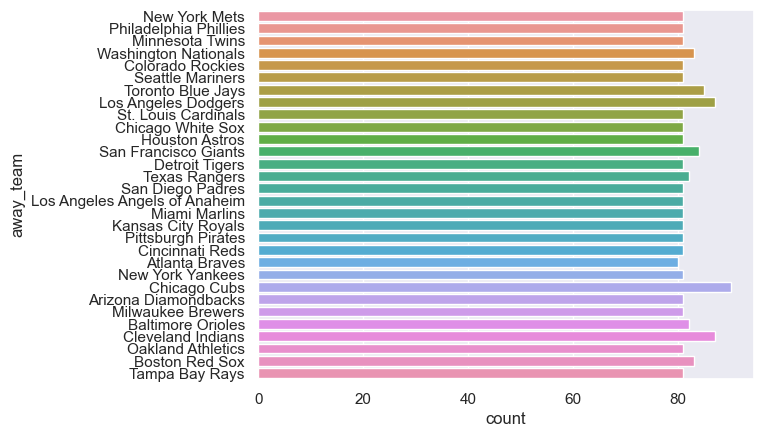

In [36]:
sns.countplot(y = 'away_team', data = datos);

## Gráficos de correlación

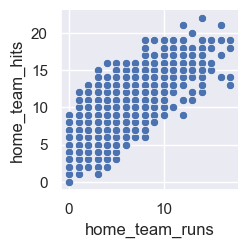

In [42]:
sns.pairplot(datos, x_vars=['home_team_runs'], y_vars=['home_team_hits']);

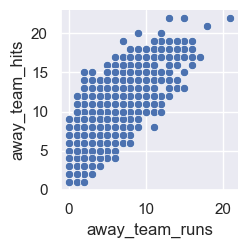

In [44]:
sns.pairplot(datos, x_vars=['away_team_runs'], y_vars=['away_team_hits']);

## Gráficos de correlación (versión extendida)

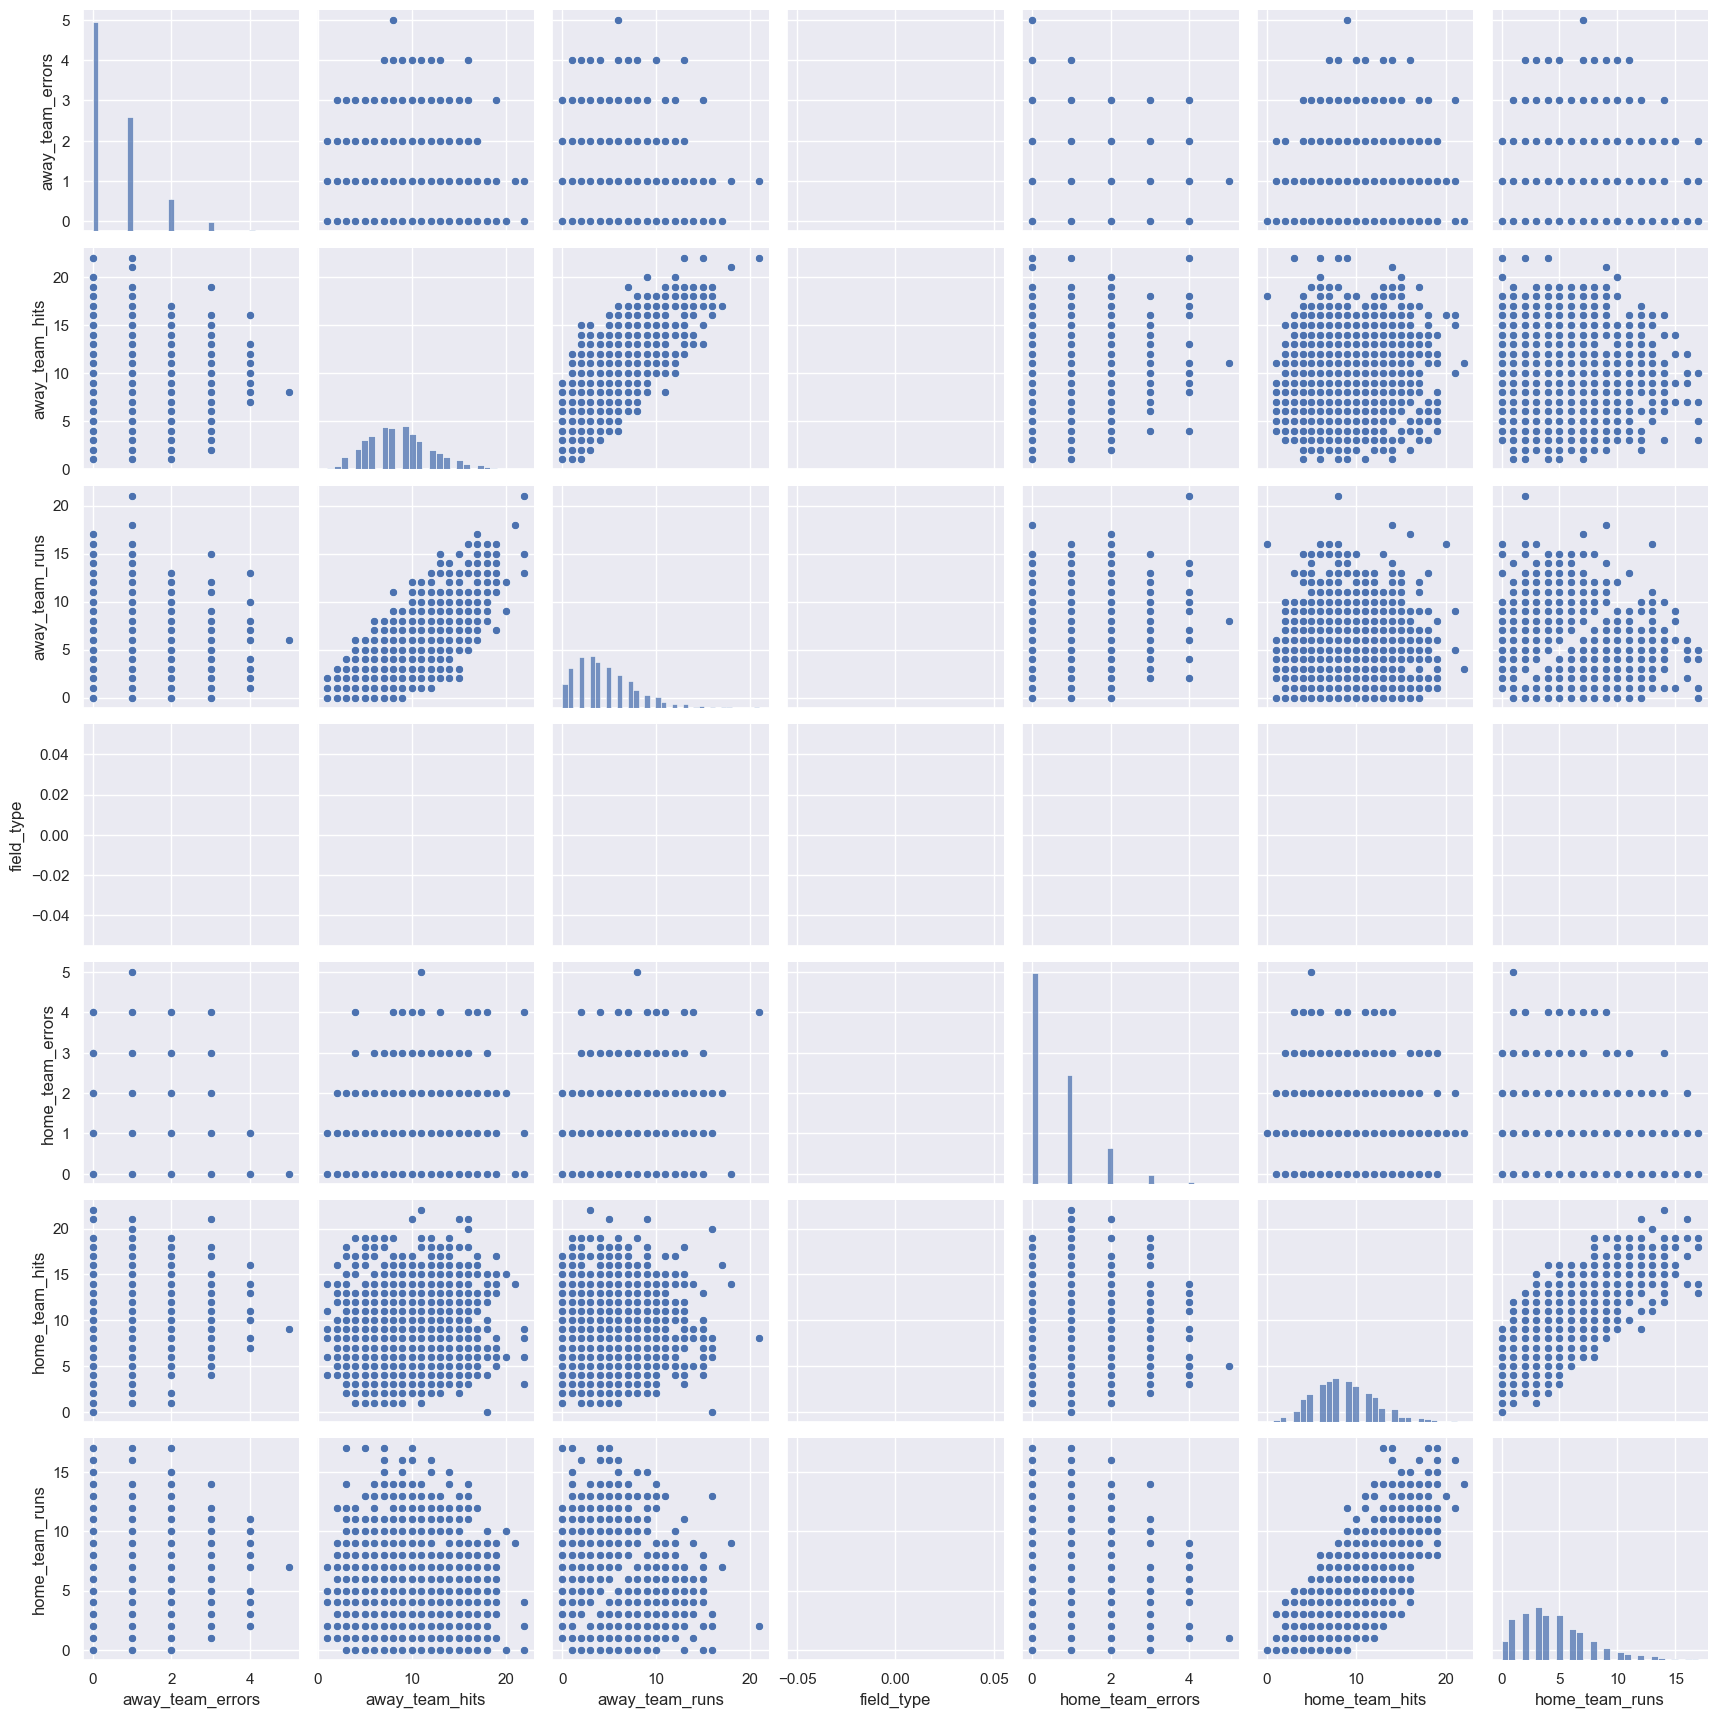

In [43]:
sns.pairplot(datos);

<AxesSubplot: xlabel='away_team_runs', ylabel='home_team_runs'>

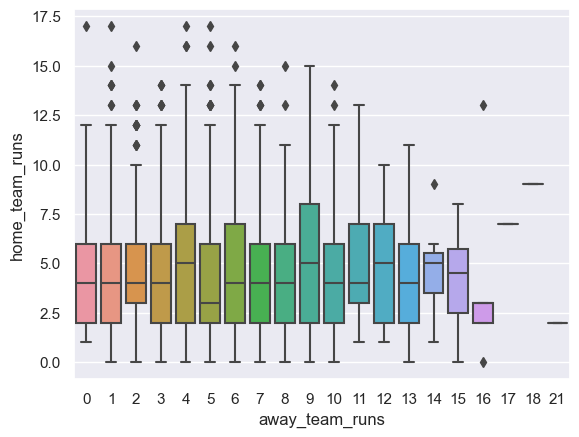

In [38]:
sns.boxplot(data=datos, x='away_team_runs', y='home_team_runs')

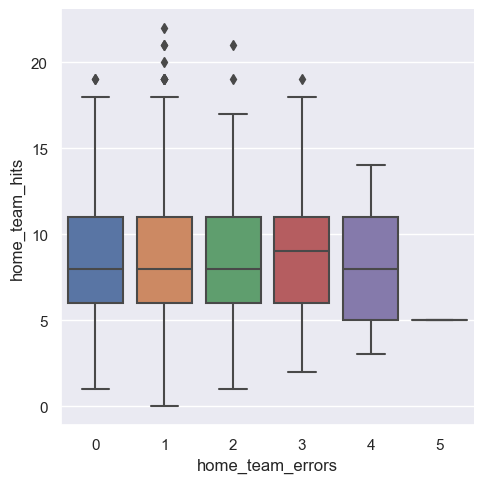

In [55]:
sns.catplot(datos, x="home_team_errors", y="home_team_hits", kind="box")

## Obtención de datos categóricos

In [56]:
datos.select_dtypes(include='object')

attendance              away_team  \
0      40,030']          New York Mets   
1      21,621']  Philadelphia Phillies   
2      12,622']        Minnesota Twins   
3      18,531']   Washington Nationals   
4      18,572']       Colorado Rockies   
...         ...                    ...   
2458   31,042']      Toronto Blue Jays   
2459   39,500']    St. Louis Cardinals   
2460   20,098']   San Francisco Giants   
2461   17,883']         Detroit Tigers   
2462   10,298']         Boston Red Sox   

                                           boxscore_url  \
0     https://www.baseball-reference.com/boxes/KCA/K...   
1     https://www.baseball-reference.com/boxes/CIN/C...   
2     https://www.baseball-reference.com/boxes/BAL/B...   
3     https://www.baseball-reference.com/boxes/ATL/A...   
4     https://www.baseball-reference.com/boxes/ARI/A...   
...                                                 ...   
2458  https://www.baseball-reference.com/boxes/TBA/T...   
2459  https://www.baseball-reference.com/boxes/PIT/P...   
2460  https://www.baseball-reference.com/boxes/MIL/M...   
2461  https://www.baseball-reference.com/boxes/MIA/M...   
2462  https://www.baseball-reference.com/boxes/CLE/C...   

                          date game_duration             game_type  \
0        Sunday, April 3, 2016        : 3:13  Night Game, on grass   
1     Wednesday, April 6, 2016        : 2:23  Night Game, on grass   
2     Wednesday, April 6, 2016        : 3:11  Night Game, on grass   
3     Wednesday, April 6, 2016        : 2:53  Night Game, on grass   
4     Wednesday, April 6, 2016        : 2:39    Day Game, on grass   
...                        ...           ...                   ...   
2458     Sunday, April 3, 2016        : 2:51     Day Game, on turf   
2459     Sunday, April 3, 2016        : 3:02    Day Game, on grass   
2460  Wednesday, April 6, 2016        : 3:19    Day Game, on grass   
2461  Wednesday, April 6, 2016        : 3:22    Day Game, on grass   
2462  Wednesday, April 6, 2016        : 3:29  Night Game, on grass   

                 home_team                                  other_info_string  \
0       Kansas City Royals  <!--  \n    <div class="section_content" id="d...   
1          Cincinnati Reds  <!--  \n    <div class="section_content" id="d...   
2        Baltimore Orioles  <!--  \n    <div class="section_content" id="d...   
3           Atlanta Braves  <!--  \n    <div class="section_content" id="d...   
4     Arizona Diamondbacks  <!--  \n    <div class="section_content" id="d...   
...                    ...                                                ...   
2458        Tampa Bay Rays  <!--  \n    <div class="section_content" id="d...   
2459    Pittsburgh Pirates  <!--  \n    <div class="section_content" id="d...   
2460     Milwaukee Brewers  <!--  \n    <div class="section_content" id="d...   
2461         Miami Marlins  <!--  \n    <div class="section_content" id="d...   
2462     Cleveland Indians  <!--  \n    <div class="section_content" id="d...   

                        start_time                          venue  
0      Start Time: 7:38 p.m. Local             : Kauffman Stadium  
1      Start Time: 7:11 p.m. Local     : Great American Ball Park  
2      Start Time: 7:07 p.m. Local  : Oriole Park at Camden Yards  
3      Start Time: 7:10 p.m. Local                 : Turner Field  
4     Start Time: 12:40 p.m. Local                  : Chase Field  
...                            ...                            ...  
2458   Start Time: 4:09 p.m. Local              : Tropicana Field  
2459   Start Time: 1:15 p.m. Local                     : PNC Park  
2460  Start Time: 12:41 p.m. Local                  : Miller Park  
2461   Start Time: 4:57 p.m. Local                 : Marlins Park  
2462   Start Time: 6:22 p.m. Local            : Progressive Field  

[2463 rows x 10 columns]

## Gráficos de datos categóricos

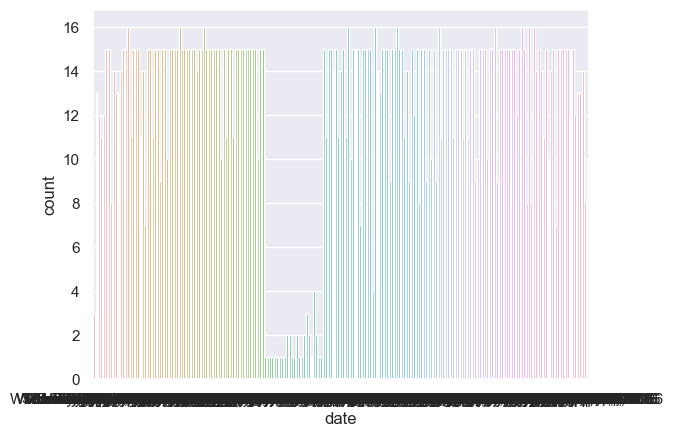

In [60]:
sns.countplot(x = 'date', data = datos);

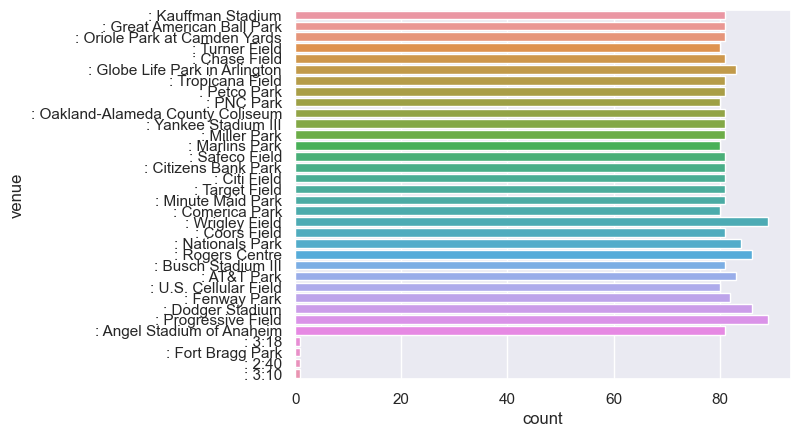

In [9]:
sns.countplot(y = 'venue', data = datos);

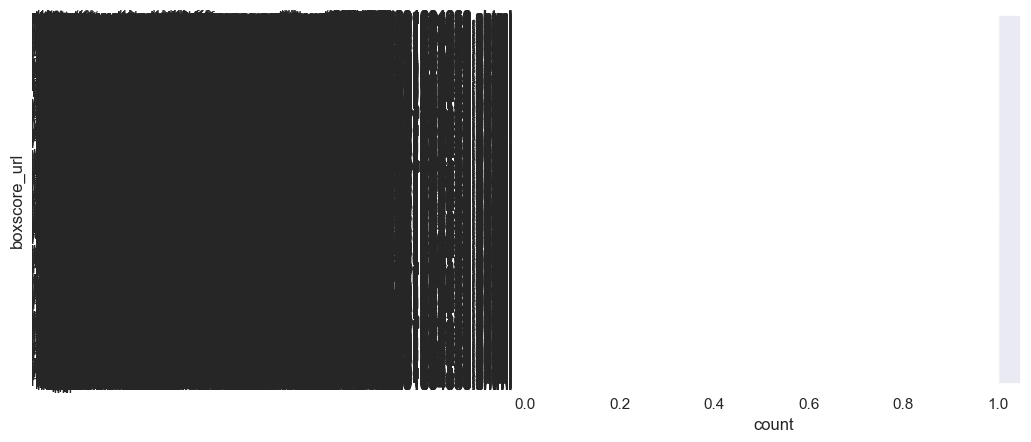

In [12]:
sns.countplot(y = 'boxscore_url', data = datos);

## Proceso de limpieza